--- 데이터 의존성 지수 계산 시작 ---
원본 데이터 포인트 수: 5

--- 회귀 분석 결과 ---
멱법칙 지수 (데이터 의존성, γ 또는 β_N): -0.1330
절편 (Intercept): 2.1636
결정 계수 (R-squared): 0.9065
p-value: 0.0125


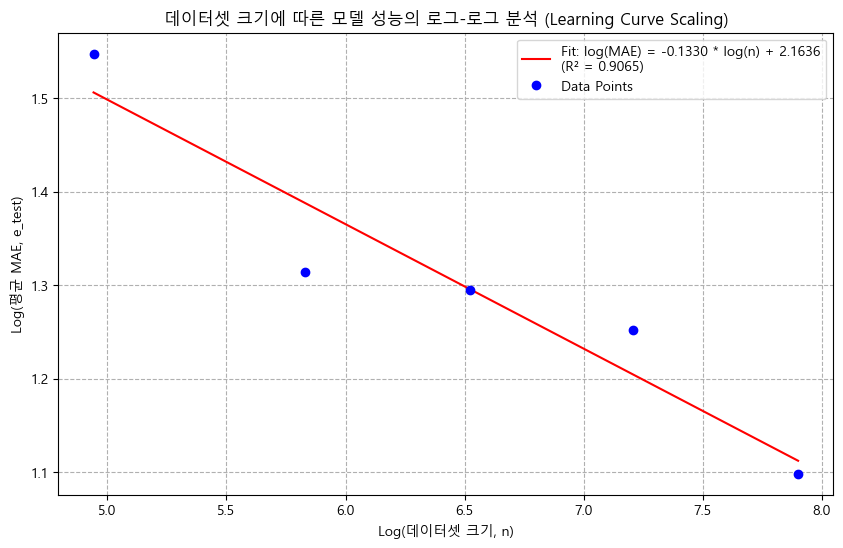


--- 데이터 의존성 지수 계산 완료 ---

--- 최종 결과 해석 ---
측정된 멱법칙 지수(데이터 의존성): γ = -0.1330
지수가 -0.1330 이므로, 데이터셋 크기가 10배 증가할 때
MAE는 약 10^-0.13배 (약 0.736배)가 되며,
이는 MAE가 약 26.4% 감소함을 의미합니다.


In [3]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd


# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


def calculate_data_dependency_exponent(n_values, mae_values, plot_results=True):
    """
    데이터셋 크기(n)와 MAE 성능 사이의 멱법칙 지수 (데이터 의존성: gamma)를 계산하고 시각화합니다.
    멱법칙 관계: MAE ≈ n^gamma
    로그-로그 관계: log(MAE) ≈ gamma * log(n)

    Args:
        n_values (list or numpy array): 각 실험에서의 데이터셋 크기 (n).
        mae_values (list or numpy array): 해당 데이터셋 크기에서의 평균 MAE (e_test).
        plot_results (bool): 로그-로그 플롯을 표시할지 여부.

    Returns:
        float: 멱법칙 지수 (gamma, 즉 데이터 의존성 지수).
        float: 회귀 분석의 결정 계수 (R-squared).
    """
    print("--- 데이터 의존성 지수 계산 시작 ---")

    # 1. 데이터 정리
    n_values = np.array(n_values)
    mae_values = np.array(mae_values)

    # 데이터 유효성 검사
    if len(n_values) != len(mae_values) or len(n_values) < 2:
        print("에러: 데이터셋 크기와 MAE 값의 개수가 다르거나, 데이터 포인트가 2개 미만입니다.")
        return None, None

    # 2. 로그-로그 변환: x = log(n), y = log(MAE)
    # 0이나 음수 값이 있으면 로그를 취할 수 없으므로 확인이 필요합니다.
    if np.any(n_values <= 0) or np.any(mae_values <= 0):
        print("경고: 데이터셋 크기(n)나 MAE 값 중 0 또는 음수가 포함되어 로그 변환을 수행할 수 없습니다.")
        return None, None
        
    log_n = np.log(n_values)     # 자연로그(ln) 사용, 밑이 10인 로그(log10)도 가능
    log_mae = np.log(mae_values) # 자연로그(ln) 사용

    print(f"원본 데이터 포인트 수: {len(n_values)}")
    
    # 3. 선형 회귀 분석 (Linear Regression)
    # log_mae ≈ gamma * log_n + intercept
    # 여기서 기울기(slope)가 찾는 멱법칙 지수 gamma입니다.
    slope, intercept, r_value, p_value, std_err = linregress(log_n, log_mae)

    gamma = slope
    r_squared = r_value**2

    print("\n--- 회귀 분석 결과 ---")
    print(f"멱법칙 지수 (데이터 의존성, γ 또는 β_N): {gamma:.4f}")
    print(f"절편 (Intercept): {intercept:.4f}")
    print(f"결정 계수 (R-squared): {r_squared:.4f}")
    print(f"p-value: {p_value:.4f}")

    # 4. 해석 및 시각화
    if plot_results:
        plt.figure(figsize=(10, 6))
        
        # 회귀선 그리기
        line = gamma * log_n + intercept
        plt.plot(log_n, line, 'r-', label=f'Fit: log(MAE) = {gamma:.4f} * log(n) + {intercept:.4f}\n(R² = {r_squared:.4f})')
        
        # 데이터 포인트 산점도
        plt.plot(log_n, log_mae, 'bo', label='Data Points')
        
        plt.xlabel('Log(데이터셋 크기, n)')
        plt.ylabel('Log(평균 MAE, e_test)')
        plt.title('데이터셋 크기에 따른 모델 성능의 로그-로그 분석 (Learning Curve Scaling)')
        plt.legend()
        plt.grid(True, which="both", ls="--")
        plt.show()

    print("\n--- 데이터 의존성 지수 계산 완료 ---")
    return gamma, r_squared

# ==============================================================================
# 🌟 사용 예시 (1단계 데이터 수집)
# ------------------------------------------------------------------------------
# 데이터: (데이터셋 크기 n, 평균 MAE e_test)
# 예시 데이터는 사용자가 제시한 예시를 기반으로 가정한 값입니다.
# (140, 7), (340, 90) -> (140, 과적합 제외), (340, 재실험값), (680, 77), (1350, 65), (2700, 예측값)
# 실제 모델 성능 지표로 사용하기 위해 'MAE'는 작을수록 좋다는 점을 고려하여 데이터를 조정하거나, 
# 사용자가 제공한 실제 MAE 값을 사용해야 합니다. 
# 여기서는 MAE가 데이터 크기에 따라 감소하는 일반적인 경향을 나타내도록 임의의 값을 사용합니다.
# ------------------------------------------------------------------------------

# 데이터셋 크기 (n)
dataset_sizes = [140, 340, 680, 1350, 2700]

# 해당 n에서의 평균 MAE (e_test) - n이 커질수록 MAE가 감소하는 경향을 나타내도록 설정
# mean_mae_values = [7.0, 5.5, 4.0, 3.2, 2.5] 

# mean_mae_values = [4.7, 3.72, 3.0, 2.5, 2.0] 

mean_mae_values = [4.7, 3.72, 3.65, 3.5, 3.0] 

# 함수 실행
data_dependency_exponent, r_sq = calculate_data_dependency_exponent(
    n_values=dataset_sizes, 
    mae_values=mean_mae_values,
    plot_results=True # 플롯을 표시합니다.
)

if data_dependency_exponent is not None:
    print("\n--- 최종 결과 해석 ---")
    print(f"측정된 멱법칙 지수(데이터 의존성): γ = {data_dependency_exponent:.4f}")
    
    # 4. 해석: gamma 값 해석
    # 10배 증가 시 성능 변화 = 10^gamma
    if data_dependency_exponent < 0:
        performance_scaling = 10**data_dependency_exponent
        percentage_reduction = (1 - performance_scaling) * 100
        print(f"지수가 {data_dependency_exponent:.4f} 이므로, 데이터셋 크기가 10배 증가할 때")
        print(f"MAE는 약 10^{data_dependency_exponent:.2f}배 (약 {performance_scaling:.3f}배)가 되며,")
        print(f"이는 MAE가 약 {percentage_reduction:.1f}% 감소함을 의미합니다.")
    elif data_dependency_exponent > 0:
        performance_scaling = 10**data_dependency_exponent
        print(f"지수가 양수({data_dependency_exponent:.4f})이므로, 데이터셋 크기가 10배 증가할 때 MAE는 약 {performance_scaling:.3f}배 증가함을 의미합니다. (비정상적이거나 과적합 가능성)")
    else:
        print("지수가 0에 가까우므로, 데이터셋 크기에 따른 MAE 변화가 미미합니다.")

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def analyze_data_dependency_with_statsmodels(n_values, mae_values):
    """
    Statsmodels OLS (최소제곱법)을 사용하여 로그-로그 변환된 데이터에 선형 회귀를 적용합니다.
    멱법칙 관계: MAE ≈ n^gamma
    선형 회귀 모델: log(MAE) = gamma * log(n) + intercept
    
    Args:
        n_values (list or numpy array): 데이터셋 크기 (n).
        mae_values (list or numpy array): 해당 n에서의 평균 MAE (e_test).

    Returns:
        statsmodels.regression.linear_model.RegressionResultsWrapper: OLS 회귀 분석 결과 객체.
    """
    print("--- Statsmodels를 이용한 데이터 의존성 분석 시작 ---")

    # 1. 데이터 정리 및 로그 변환
    n_values = np.array(n_values)
    mae_values = np.array(mae_values)
    
    # 로그 변환 수행
    # x = log(n), y = log(MAE)
    log_n = np.log(n_values)
    log_mae = np.log(mae_values)
    
    # 2. Statsmodels OLS 모델 적용
    
    # 종속 변수 (Y): log(MAE)
    df_y = pd.Series(log_mae, name="Log_MAE") 
    
    # 독립 변수 (X): log(n)
    df_x = pd.Series(log_n, name="Log_n") 

    # 독립 변수에 상수항(intercept) 추가
    # 이는 log(MAE) = gamma * log(n) + intercept 식에서 intercept를 의미합니다.
    df_x_with_const = sm.add_constant(df_x)

    # OLS (Ordinary Least Squares) 모델 생성
    model = sm.OLS(df_y, df_x_with_const) 
    
    # 모델 학습 및 결과 저장
    result = model.fit()

    print("\n--- OLS 회귀 분석 상세 요약 (Summary) ---")
    print(result.summary())

    # 3. 주요 결과 해석
    # Log_n의 계수(coefficient)가 멱법칙 지수 gamma (데이터 의존성) 입니다.
    gamma = result.params['Log_n']
    r_squared = result.rsquared

    print("\n--- 최종 결과 해석 ---")
    print(f"멱법칙 지수 (데이터 의존성, γ 또는 β_N): {gamma:.4f}")
    print(f"결정 계수 (R-squared): {r_squared:.4f}")

    if gamma < 0:
        performance_scaling = 10**gamma
        percentage_reduction = (1 - performance_scaling) * 100
        print(f"**해석**: 데이터셋 크기가 10배 증가할 때, MAE는 약 {performance_scaling:.3f}배가 되어, 약 {percentage_reduction:.1f}% 감소함을 의미합니다.")
    else:
        performance_scaling = 10**gamma
        print(f"**해석**: 지수가 양수({gamma:.4f})이므로, 데이터셋 크기가 10배 증가할 때 MAE는 약 {performance_scaling:.3f}배 증가함을 의미합니다. (비정상적인 결과)")

    print("\n--- 분석 완료 ---")
    return result

# ==============================================================================
# 🌟 사용 예시 (이전 질문에서 사용된 데이터와 동일)
# 데이터: (데이터셋 크기 n, 평균 MAE e_test)
# ------------------------------------------------------------------------------
dataset_sizes = [140, 340, 680, 1350, 2700]
# mean_mae_values = [7.0, 5.5, 4.0, 3.2, 2.5] 
# mean_mae_values = [7.0, 90.0, 77.0, 65.0, 75.62] 
mean_mae_values = [4.7, 3.72, 3.49, 3.22, 2.86] 

# ------------------------------------------------------------------------------

# 함수 실행
ols_results = analyze_data_dependency_with_statsmodels(
    n_values=dataset_sizes, 
    mae_values=mean_mae_values
)

--- Statsmodels를 이용한 데이터 의존성 분석 시작 ---

--- OLS 회귀 분석 상세 요약 (Summary) ---
                            OLS Regression Results                            
Dep. Variable:                Log_MAE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     47.13
Date:                Mon, 29 Sep 2025   Prob (F-statistic):            0.00633
Time:                        12:17:51   Log-Likelihood:                 9.3631
No. Observations:                   5   AIC:                            -14.73
Df Residuals:                       3   BIC:                            -15.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

c:\Users\samjin\new2\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def analyze_data_dependency_with_statsmodels(n_values, mae_values):
    """
    Statsmodels OLS (최소제곱법)을 사용하여 로그-로그 변환된 데이터에 선형 회귀를 적용합니다.
    멱법칙 관계: MAE ≈ n^gamma
    선형 회귀 모델: log(MAE) = gamma * log(n) + intercept
    
    Args:
        n_values (list or numpy array): 데이터셋 크기 (n).
        mae_values (list or numpy array): 해당 n에서의 평균 MAE (e_test).

    Returns:
        statsmodels.regression.linear_model.RegressionResultsWrapper: OLS 회귀 분석 결과 객체.
    """
    print("--- Statsmodels를 이용한 데이터 의존성 분석 시작 ---")

    # 1. 데이터 정리 및 로그 변환
    n_values = np.array(n_values)
    mae_values = np.array(mae_values)
    
    # 로그 변환 수행
    # x = log(n), y = log(MAE)
    log_n = np.log(n_values)
    log_mae = np.log(mae_values)
    
    # 2. Statsmodels OLS 모델 적용
    
    # 종속 변수 (Y): log(MAE)
    df_y = pd.Series(log_mae, name="Log_MAE") 
    
    # 독립 변수 (X): log(n)
    df_x = pd.Series(log_n, name="Log_n") 

    # 독립 변수에 상수항(intercept) 추가
    # 이는 log(MAE) = gamma * log(n) + intercept 식에서 intercept를 의미합니다.
    df_x_with_const = sm.add_constant(df_x)

    # OLS (Ordinary Least Squares) 모델 생성
    model = sm.OLS(df_y, df_x_with_const) 
    
    # 모델 학습 및 결과 저장
    result = model.fit()

    print("\n--- OLS 회귀 분석 상세 요약 (Summary) ---")
    print(result.summary())

    # 3. 주요 결과 해석
    # Log_n의 계수(coefficient)가 멱법칙 지수 gamma (데이터 의존성) 입니다.
    gamma = result.params['Log_n']
    r_squared = result.rsquared

    print("\n--- 최종 결과 해석 ---")
    print(f"멱법칙 지수 (데이터 의존성, γ 또는 β_N): {gamma:.4f}")
    print(f"결정 계수 (R-squared): {r_squared:.4f}")

    if gamma < 0:
        performance_scaling = 10**gamma
        percentage_reduction = (1 - performance_scaling) * 100
        print(f"**해석**: 데이터셋 크기가 10배 증가할 때, MAE는 약 {performance_scaling:.3f}배가 되어, 약 {percentage_reduction:.1f}% 감소함을 의미합니다.")
    else:
        performance_scaling = 10**gamma
        print(f"**해석**: 지수가 양수({gamma:.4f})이므로, 데이터셋 크기가 10배 증가할 때 MAE는 약 {performance_scaling:.3f}배 증가함을 의미합니다. (비정상적인 결과)")

    print("\n--- 분석 완료 ---")
    return result

# ==============================================================================
# 🌟 사용 예시 (이전 질문에서 사용된 데이터와 동일)
# 데이터: (데이터셋 크기 n, 평균 MAE e_test)
# ------------------------------------------------------------------------------
dataset_sizes = [140, 340, 680, 1350, 2700]
# mean_mae_values = [7.0, 5.5, 4.0, 3.2, 2.5] 
# mean_mae_values = [7.0, 90.0, 77.0, 65.0, 75.62] 
# mean_mae_values = [4.7, 3.72, 3.49, 3.38, 3.0] 
mean_mae_values = [4.43, 2.50, 1.94, 1.53, 0.98] 

# ------------------------------------------------------------------------------

# 함수 실행
ols_results = analyze_data_dependency_with_statsmodels(
    n_values=dataset_sizes, 
    mae_values=mean_mae_values
)

--- Statsmodels를 이용한 데이터 의존성 분석 시작 ---

--- OLS 회귀 분석 상세 요약 (Summary) ---
                            OLS Regression Results                            
Dep. Variable:                Log_MAE   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     197.7
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           0.000779
Time:                        11:49:37   Log-Likelihood:                 6.8519
No. Observations:                   5   AIC:                            -9.704
Df Residuals:                       3   BIC:                            -10.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

c:\Users\samjin\new2\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [10]:
import torch
import torch.nn as nn

# Keras 코드와 달리 PyTorch는 레이어 구조를 클래스로 정의하는 것이 일반적입니다.

def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)

def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution for downsampling"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    """
    ResNet-18의 기본 블록 (BasicBlock) 구조입니다.
    """
    expansion = 1 # BasicBlock에서는 출력 채널이 입력 채널의 1배입니다.

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        
        # 1. Conv1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        
        # 2. Conv2
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        
        # Downsample 경로 (Stride가 2이거나 채널 수가 다를 때 사용)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x # 잔차 연결을 위한 입력 값 저장

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        # Downsample 경로가 있다면 실행 (차원 맞추기)
        if self.downsample is not None:
            identity = self.downsample(x)

        # 잔차 연결 (Residual Connection)
        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    """
    AngleHead의 Backbone으로 사용되는 ResNet-18 구조입니다.
    """
    def __init__(self, block, layers, num_classes=2, zero_init_residual=False):
        super(ResNet, self).__init__()
        self.inplanes = 64
        
        # 1. 초기 Convolution, BN, ReLU, MaxPool
        # (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # 2. ResNet 스테이지 (layer1 ~ layer4)
        self.layer1 = self._make_layer(block, 64, layers[0])  # 2 x BasicBlock
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2) # 2 x BasicBlock, Downsample
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2) # 2 x BasicBlock, Downsample
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2) # 2 x BasicBlock, Downsample
        
        # 3. 최종 분류 레이어
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1)) # GlobalAveragePooling2D와 동일
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # Weight Initialization (he_normal과 유사한 Kaiming Initialization)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def _make_layer(self, block, planes, blocks, stride=1):
        """
        하나의 ResNet 스테이지 (Layer)를 생성합니다.
        planes: 스테이지의 출력 채널 수, blocks: 블록의 수
        """
        downsample = None
        # 첫 번째 블록에서 Downsample이 필요한 경우 (stride=2 또는 채널 불일치)
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        # 첫 번째 블록 (차원 축소 또는 채널 확장 가능)
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        
        # 나머지 블록들
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        # 1. 초기 레이어
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        # 2. 스테이지
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # 3. 최종 분류
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

class AngleHead(nn.Module):
    """
    전체 모델 구조입니다. Backbone (ResNet)을 포함합니다.
    """
    def __init__(self, num_classes=2):
        super(AngleHead, self).__init__()
        # ResNet-18은 [2, 2, 2, 2] 블록 구성을 사용합니다.
        self.backbone = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes)

    def forward(self, x):
        return self.backbone(x)


def resnet18_angle_head(num_classes=2):
    """
    ResNet-18을 Backbone으로 사용하는 AngleHead 모델을 생성합니다.
    """
    model = AngleHead(num_classes=num_classes)
    return model

if __name__ == '__main__':
    # 모델 생성 (출력 클래스 2개)
    model = resnet18_angle_head(num_classes=2)
    
    # 모델 테스트: (배치 크기, 채널, 높이, 너비) = (1, 3, 64, 64)
    # PyTorch는 일반적으로 (B, C, H, W) 순서입니다.
    dummy_input = torch.randn(1, 3, 64, 64)
    output = model(dummy_input)
    
    print("PyTorch AngleHead (ResNet-18) 모델 생성 완료")
    print("입력 텐서 형태:", dummy_input.shape)
    print("출력 텐서 형태:", output.shape)
    print("모델 구조:", model)
    
    # 만약 .pth 파일을 불러와서 사용하고 싶다면:
    # model.load_state_dict(torch.load('your_weights.pth'))
    # model.eval()


PyTorch AngleHead (ResNet-18) 모델 생성 완료
입력 텐서 형태: torch.Size([1, 3, 64, 64])
출력 텐서 형태: torch.Size([1, 2])
모델 구조: AngleHead(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride

모델 생성 완료
입력 텐서 형태: torch.Size([1, 3, 64, 64])
Hook 등록 완료: layer1_block0
Hook 등록 완료: avgpool
------------------------------
모델 출력 텐서 형태: torch.Size([1, 2])
캡처된 특징 맵 키: ['layer1_block0', 'avgpool']
✔️ 특징 맵 이미지 저장 완료: layer1_block0_feature_map_debug.png


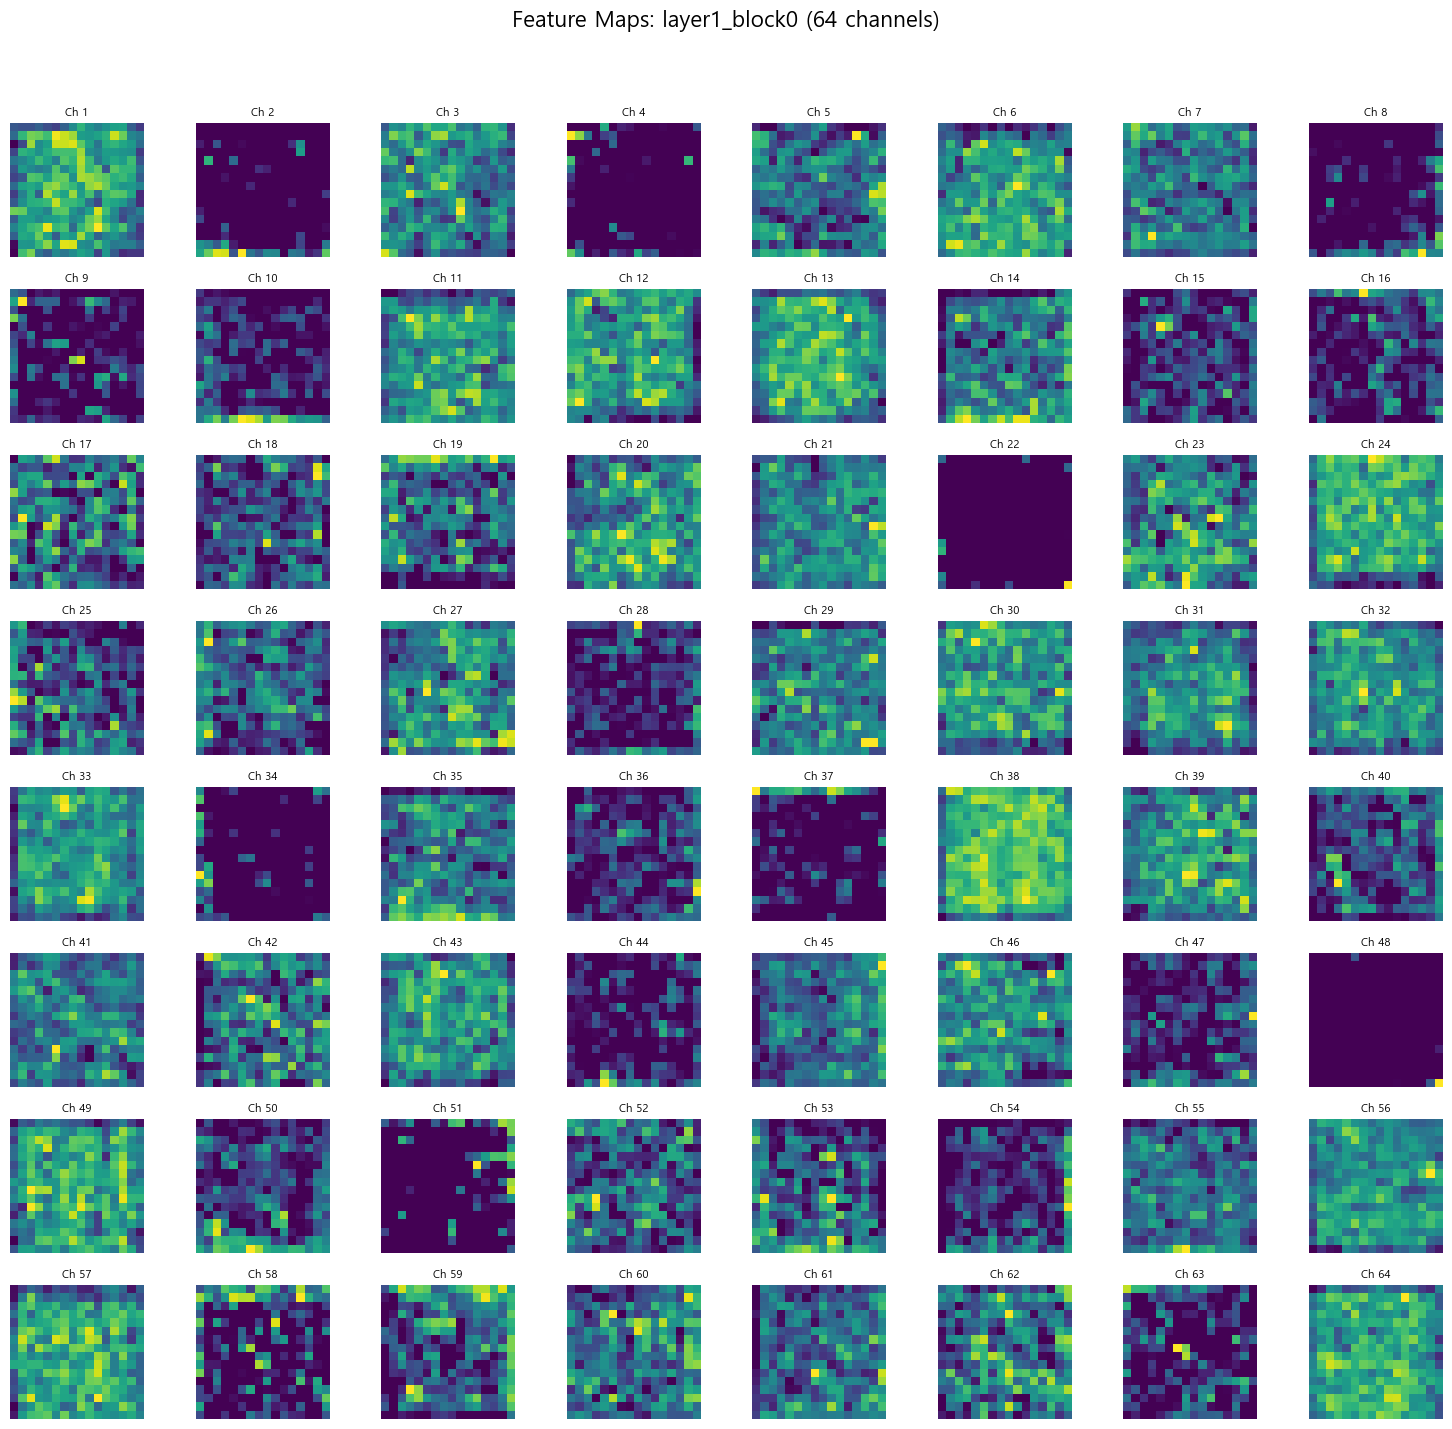

⚠️ avgpool: 채널 수가 많아 처음 64개 채널만 시각화합니다.
✔️ 특징 맵 이미지 저장 완료: avgpool_feature_map_debug.png


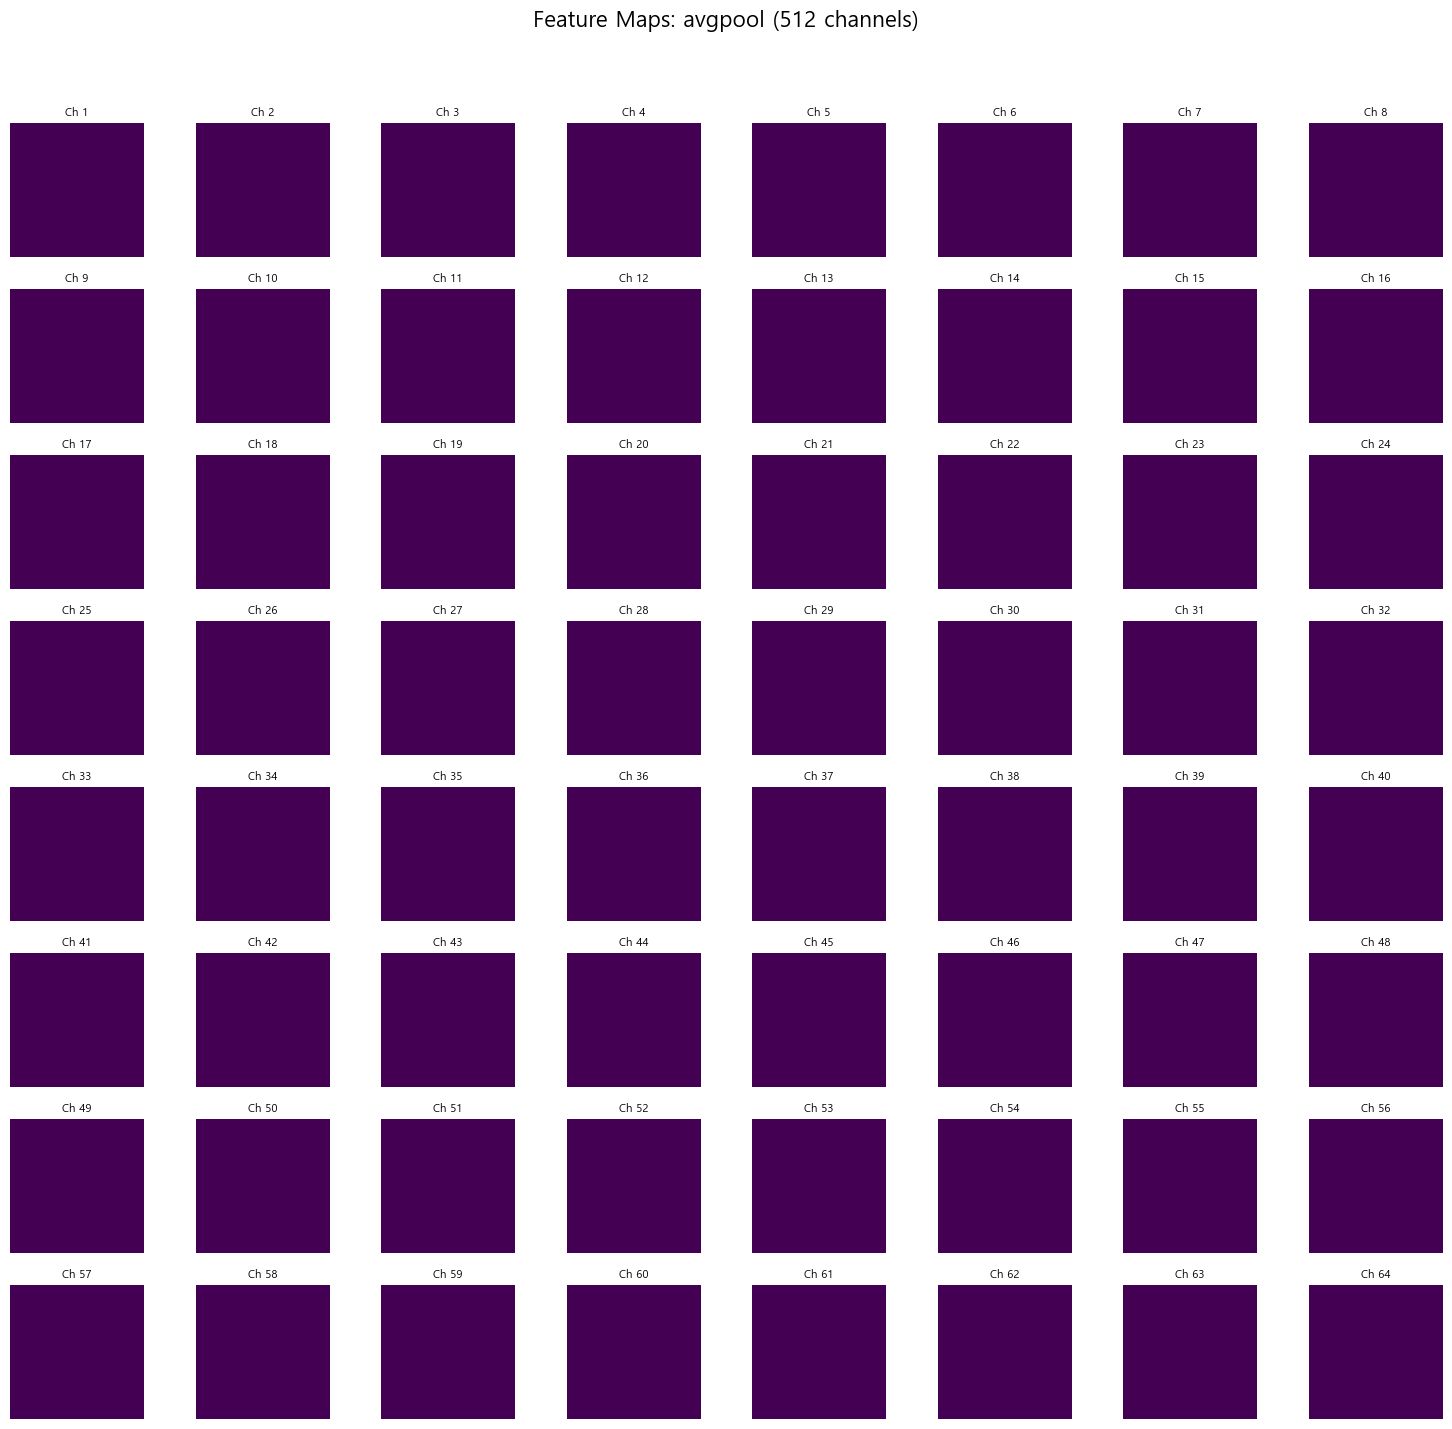

------------------------------
모든 Hook 해제 완료.


In [11]:
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
import os

# -----------------------------------------------------------
# 1. 모델 클래스 정의 (제시된 구조에 맞게 ResNet-18 기반으로 간략화)
# -----------------------------------------------------------
class AngleHead(nn.Module):
    def __init__(self, num_classes=2):
        super(AngleHead, self).__init__()
        # PyTorch의 ResNet-18을 백본으로 사용
        self.backbone = models.resnet18(weights=None)
        
        # 마지막 FC 계층을 512 -> 2 출력으로 변경
        # 이 부분이 AngleHead의 최종 선형 계층이 됩니다.
        num_ftrs = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.backbone(x)

# 모델 생성 및 더미 입력 텐서 준비
model = AngleHead(num_classes=2)
# 모델을 평가 모드로 설정 (BatchNorm, Dropout 등의 동작을 고정)
model.eval() 
print("모델 생성 완료")

# [1, 3, 64, 64] 형태의 더미 입력 텐서
sample_input = torch.randn(1, 3, 64, 64)
print(f"입력 텐서 형태: {sample_input.size()}")

# -----------------------------------------------------------
# 2. Forward Hook 정의 및 등록
# -----------------------------------------------------------
# 중간 출력을 저장할 딕셔너리
feature_maps = {}

def get_activation(name):
    """지정된 레이어의 출력을 feature_maps 딕셔너리에 저장하는 Hook 함수를 반환합니다."""
    def hook(model, input, output):
        # 기울기 계산에서 제외하고 CPU로 이동 후 딕셔너리에 저장
        feature_maps[name] = output.detach().cpu() 
    return hook

# 시각화를 원하는 레이어의 이름을 지정합니다.
# ResNet-18의 첫 번째 블록(layer1[0])의 출력과 마지막 레이어(avgpool) 출력을 캡처
target_layers = {
    'layer1_block0': model.backbone.layer1[0],
    'avgpool': model.backbone.avgpool 
}

# Hook 등록
hook_handles = {}
for name, layer in target_layers.items():
    hook_handles[name] = layer.register_forward_hook(get_activation(name))
    print(f"Hook 등록 완료: {name}")


# -----------------------------------------------------------
# 3. 순전파 실행 및 특징 맵 캡처
# -----------------------------------------------------------
with torch.no_grad(): # 역전파 계산을 비활성화하여 메모리 및 속도 최적화
    output = model(sample_input)

print("-" * 30)
print(f"모델 출력 텐서 형태: {output.size()}")
print(f"캡처된 특징 맵 키: {list(feature_maps.keys())}")

# -----------------------------------------------------------
# 4. 특징 맵 시각화 및 저장
# -----------------------------------------------------------
def visualize_and_save_feature_map(name, features):
    """캡처된 특징 맵을 시각화하고 이미지 파일로 저장합니다."""
    # 특징 맵은 [1(배치), C(채널), H, W] 형태입니다. 배치 차원 제거
    features = features[0] 
    num_channels = features.shape[0]

    # 시각화할 채널 수를 64개로 제한 (ResNet의 layer1은 64채널)
    if num_channels > 64:
        display_channels = 64
        print(f"⚠️ {name}: 채널 수가 많아 처음 64개 채널만 시각화합니다.")
    else:
        display_channels = num_channels
    
    # 그리드 크기 계산 (예: 64채널 -> 8x8)
    grid_size = int(np.ceil(np.sqrt(display_channels)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    fig.suptitle(f'Feature Maps: {name} ({num_channels} channels)', fontsize=16)

    # 특징 맵 정규화 (0~1 사이로)
    # 각 채널마다 독립적으로 처리하면 대비가 더 잘 보입니다.
    for i in range(display_channels):
        ax = axes[i // grid_size, i % grid_size]
        feature_image = features[i].cpu().numpy()
        
        # 특징 맵 값의 범위가 다양할 수 있으므로 0~1로 정규화
        min_val = np.min(feature_image)
        max_val = np.max(feature_image)
        if max_val > min_val:
            normalized_image = (feature_image - min_val) / (max_val - min_val)
        else:
            normalized_image = feature_image # 모든 값이 같으면 정규화 불필요

        ax.imshow(normalized_image, cmap='viridis') # 'viridis'는 좋은 대비를 제공
        ax.set_title(f'Ch {i+1}', fontsize=8)
        ax.axis('off')

    # 사용하지 않는 서브플롯 숨기기
    for i in range(display_channels, grid_size * grid_size):
        axes[i // grid_size, i % grid_size].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # 이미지 파일로 저장
    save_path = f'{name}_feature_map_debug.png'
    plt.savefig(save_path)
    print(f"✔️ 특징 맵 이미지 저장 완료: {save_path}")
    plt.show()

# 시각화 실행
for name, features in feature_maps.items():
    if features.dim() == 4: # CNN 중간 출력 (특징 맵)일 경우
        visualize_and_save_feature_map(name, features)
    elif features.dim() == 2: # avgpool 등의 출력 (벡터)일 경우
        print(f"💡 {name}는 벡터 출력 형태 ({features.size()})이므로 이미지 시각화는 생략합니다.")


# Hook 해제 (메모리 누수 방지)
for handle in hook_handles.values():
    handle.remove()
print("-" * 30)
print("모든 Hook 해제 완료.")

✔️ 이미지 로드 완료: 0-KakaoTalk_20250827_195138253_05.png
✔️ 전처리 후 입력 텐서 형태: torch.Size([1, 3, 64, 64])
------------------------------
모델 출력 텐서 형태: torch.Size([1, 2])
캡처된 특징 맵 키: ['layer1_block0', 'avgpool']
✔️ 특징 맵 이미지 저장 완료: 0-KakaoTalk_20250827_195138253_05_layer1_block0_debug.png


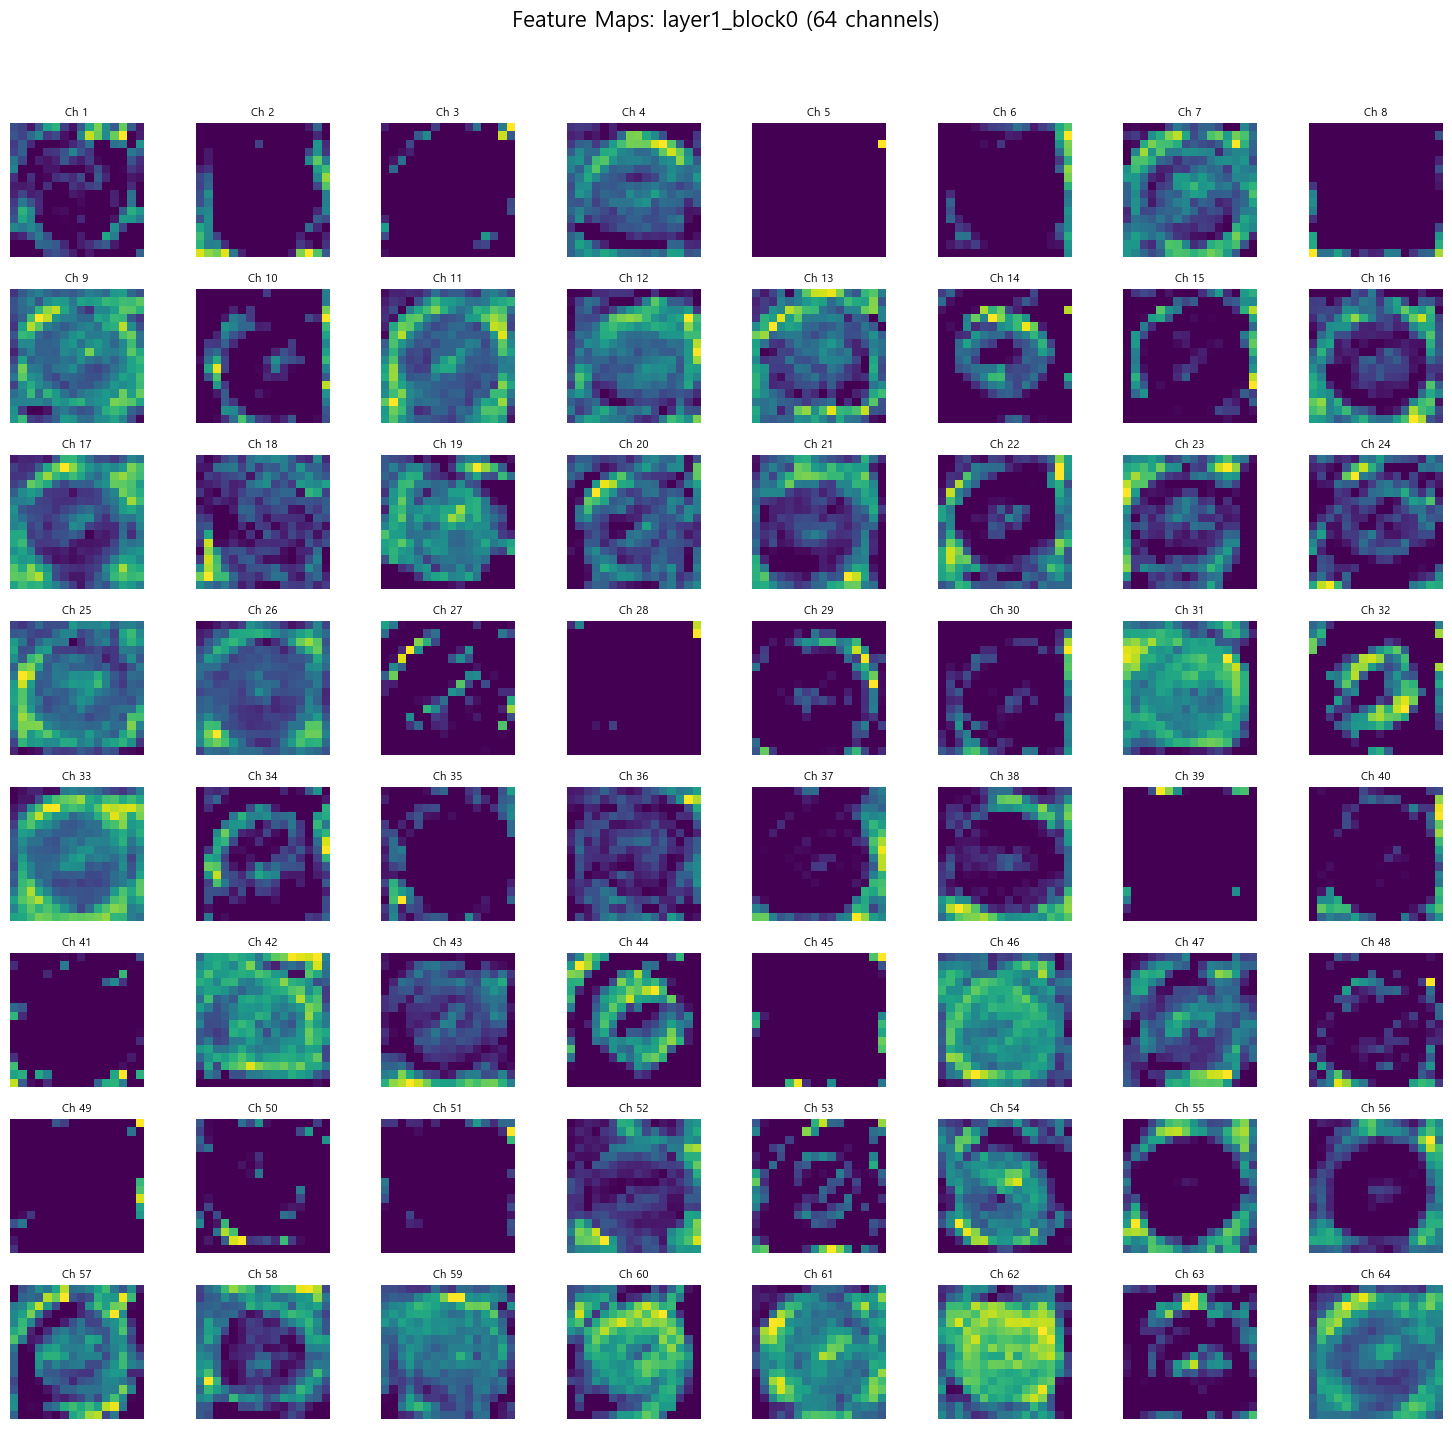

✔️ 특징 맵 이미지 저장 완료: 0-KakaoTalk_20250827_195138253_05_avgpool_debug.png


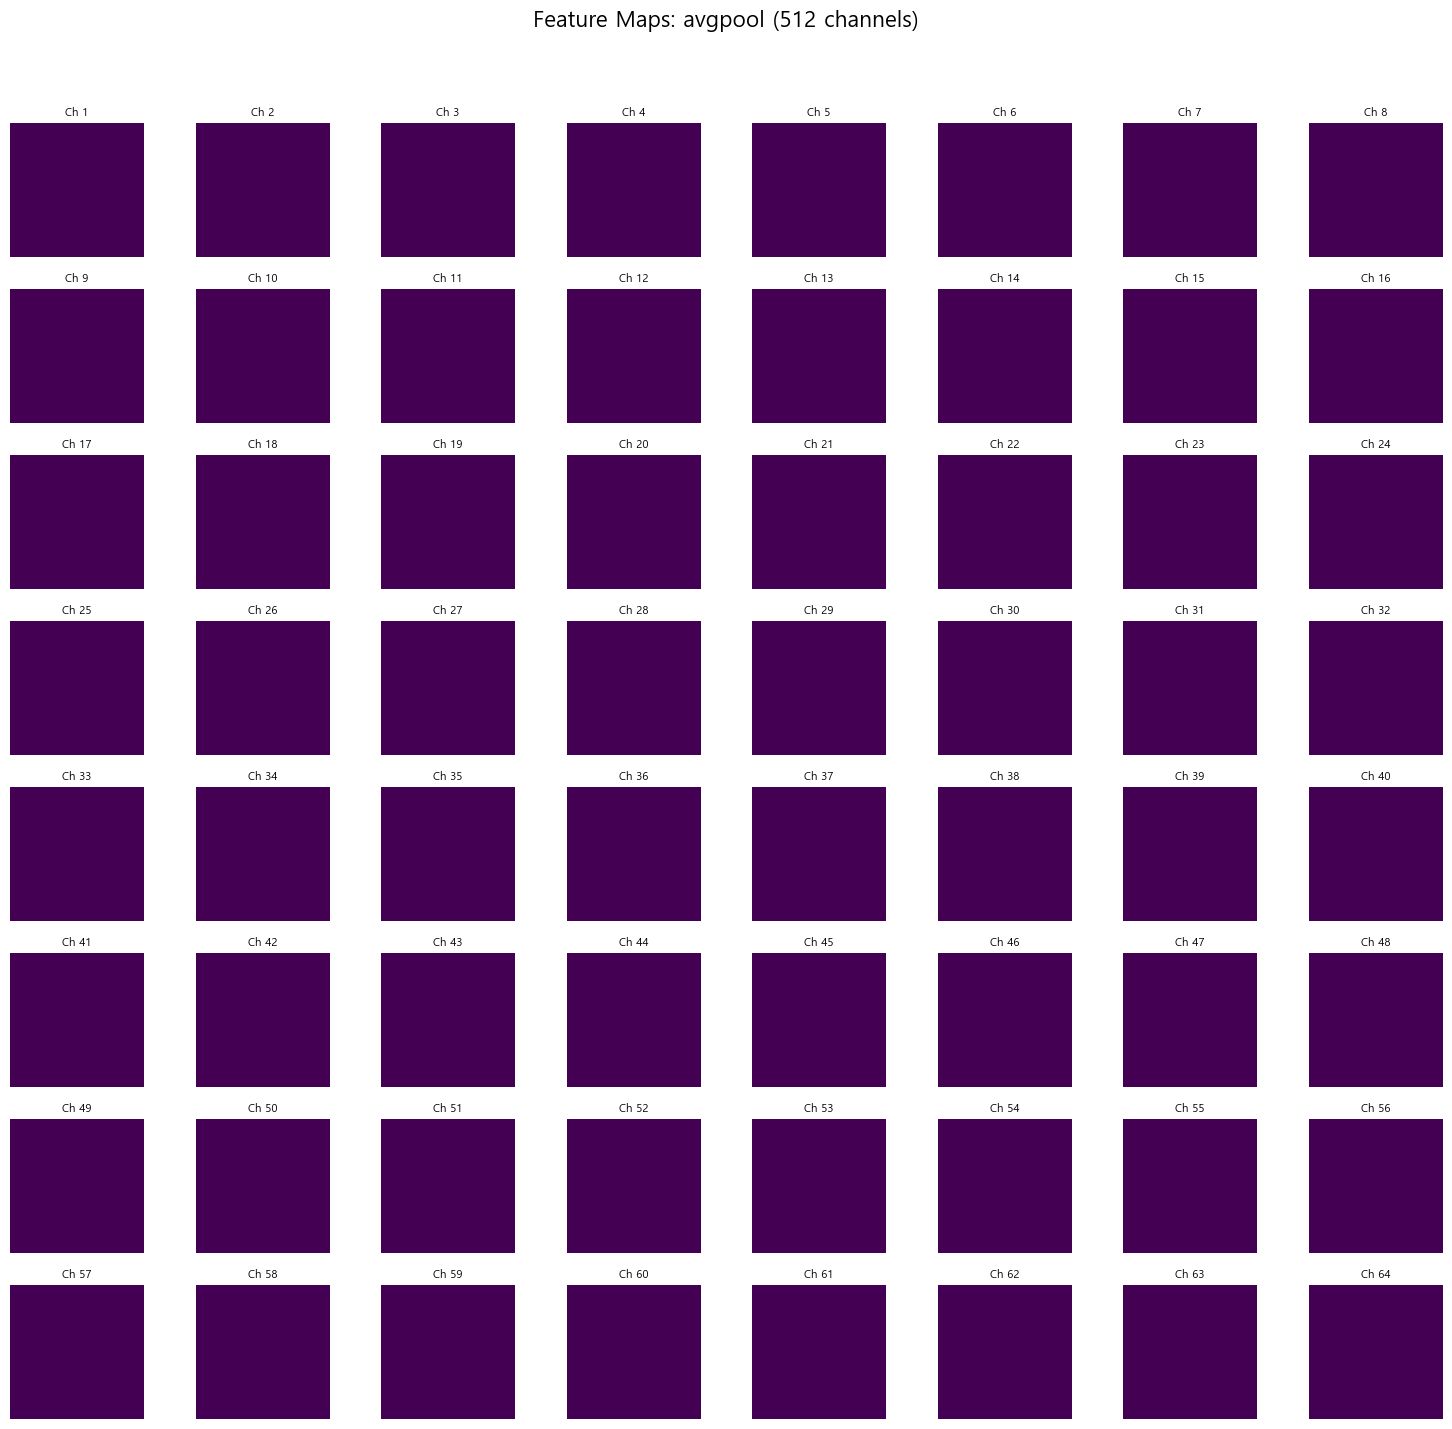

------------------------------
모든 Hook 해제 완료.


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# -----------------------------------------------------------
# 1. 파일 경로 설정 및 이미지 로드 (수정된 부분)
# -----------------------------------------------------------
# 사용자님이 업로드할 파일 이름으로 설정합니다.
IMAGE_FILE_PATH = '0-KakaoTalk_20250827_195138253_05.png' 

try:
    # 이미지 로드
    img = Image.open(IMAGE_FILE_PATH).convert('RGB')
    print(f"✔️ 이미지 로드 완료: {IMAGE_FILE_PATH}")
    
    # 모델 입력에 맞는 전처리 정의
    # (1) 크기 조절: 모델 입력 크기 64x64에 맞춤
    # (2) 텐서 변환: PyTorch 텐서로 변환 (HWC -> CHW, 0-255 -> 0.0-1.0)
    # (3) 정규화: ResNet 학습에 일반적으로 사용되는 평균/분산으로 정규화
    preprocess = transforms.Compose([
        transforms.Resize((64, 64)),  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # 이미지 전처리 및 배치 차원 추가 ([3, 64, 64] -> [1, 3, 64, 64])
    sample_input = preprocess(img).unsqueeze(0)
    print(f"✔️ 전처리 후 입력 텐서 형태: {sample_input.size()}")

except FileNotFoundError:
    print(f"❌ 오류: 파일 '{IMAGE_FILE_PATH}'을(를) 찾을 수 없습니다. 파일을 Colab에 업로드했는지 확인해주세요.")
    # 오류 발생 시 더미 텐서로 대체하여 코드를 계속 실행
    sample_input = torch.randn(1, 3, 64, 64)
    
# -----------------------------------------------------------
# 2. 모델 클래스 정의 및 Hook 정의 (이전 코드와 동일)
# -----------------------------------------------------------
class AngleHead(nn.Module):
    def __init__(self, num_classes=2):
        super(AngleHead, self).__init__()
        self.backbone = models.resnet18(weights=None)
        num_ftrs = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.backbone(x)

model = AngleHead(num_classes=2)
model.eval() 

feature_maps = {}

def get_activation(name):
    def hook(model, input, output):
        feature_maps[name] = output.detach().cpu() 
    return hook

target_layers = {
    'layer1_block0': model.backbone.layer1[0],
    'avgpool': model.backbone.avgpool 
}

hook_handles = {}
for name, layer in target_layers.items():
    hook_handles[name] = layer.register_forward_hook(get_activation(name))


# -----------------------------------------------------------
# 3. 순전파 실행 및 특징 맵 캡처
# -----------------------------------------------------------
with torch.no_grad():
    output = model(sample_input)

print("-" * 30)
print(f"모델 출력 텐서 형태: {output.size()}")
print(f"캡처된 특징 맵 키: {list(feature_maps.keys())}")


# -----------------------------------------------------------
# 4. 특징 맵 시각화 및 저장 (이전 코드와 동일)
# -----------------------------------------------------------
def visualize_and_save_feature_map(name, features):
    features = features[0] 
    num_channels = features.shape[0]
    display_channels = min(num_channels, 64)
    grid_size = int(np.ceil(np.sqrt(display_channels)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    fig.suptitle(f'Feature Maps: {name} ({num_channels} channels)', fontsize=16)

    for i in range(display_channels):
        ax = axes[i // grid_size, i % grid_size]
        feature_image = features[i].cpu().numpy()
        
        # 특징 맵 정규화 (Min-Max)
        min_val = np.min(feature_image)
        max_val = np.max(feature_image)
        if max_val > min_val:
            normalized_image = (feature_image - min_val) / (max_val - min_val)
        else:
            normalized_image = feature_image 

        ax.imshow(normalized_image, cmap='viridis')
        ax.set_title(f'Ch {i+1}', fontsize=8)
        ax.axis('off')

    for i in range(display_channels, grid_size * grid_size):
        axes[i // grid_size, i % grid_size].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    save_path = f'{os.path.basename(IMAGE_FILE_PATH).split(".")[0]}_{name}_debug.png'
    plt.savefig(save_path)
    print(f"✔️ 특징 맵 이미지 저장 완료: {save_path}")
    plt.show()

# 시각화 실행
for name, features in feature_maps.items():
    if features.dim() == 4:
        visualize_and_save_feature_map(name, features)
    elif features.dim() == 2:
        print(f"💡 {name}는 벡터 출력 형태 ({features.size()})이므로 이미지 시각화는 생략합니다.")


# Hook 해제 
for handle in hook_handles.values():
    handle.remove()
print("-" * 30)
print("모든 Hook 해제 완료.")

In [13]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# -----------------------------------------------------------
# 1. 파일 경로 설정 및 이미지 로드
# -----------------------------------------------------------
IMAGE_FILE_PATH = '0-KakaoTalk_20250827_195138253_05.png' 
SAVE_DIR = 'feature_maps_output'
os.makedirs(SAVE_DIR, exist_ok=True) # 특징 맵 저장을 위한 디렉토리 생성

try:
    img = Image.open(IMAGE_FILE_PATH).convert('RGB')
    print(f"✔️ 이미지 로드 완료: {IMAGE_FILE_PATH}")
    
    preprocess = transforms.Compose([
        transforms.Resize((64, 64)),  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    sample_input = preprocess(img).unsqueeze(0)
    print(f"✔️ 전처리 후 입력 텐서 형태: {sample_input.size()}")

except FileNotFoundError:
    print(f"❌ 오류: 파일 '{IMAGE_FILE_PATH}'을(를) 찾을 수 없습니다. 파일을 Colab에 업로드했는지 확인해주세요.")
    # 오류 발생 시 무작위 텐서로 대체
    sample_input = torch.randn(1, 3, 64, 64)
    
# -----------------------------------------------------------
# 2. 모델 클래스 정의 및 Hook 정의
# -----------------------------------------------------------
class AngleHead(nn.Module):
    def __init__(self, num_classes=2):
        super(AngleHead, self).__init__()
        self.backbone = models.resnet18(weights=None)
        num_ftrs = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.backbone(x)

model = AngleHead(num_classes=2)
model.eval() 
print("모델 생성 완료")

feature_maps = {}

def get_activation(name):
    """지정된 레이어의 출력을 feature_maps 딕셔너리에 저장하는 Hook 함수를 반환합니다."""
    def hook(model, input, output):
        feature_maps[name] = output.detach().cpu() 
    return hook

# 캡처할 모든 주요 레이어 정의 (ResNet-18 기준)
target_layers = {
    'conv1': model.backbone.conv1,
    'layer1_block0': model.backbone.layer1[0],
    'layer1_block1': model.backbone.layer1[1],
    'layer2_block0': model.backbone.layer2[0],
    'layer2_block1': model.backbone.layer2[1],
    'layer3_block0': model.backbone.layer3[0],
    'layer3_block1': model.backbone.layer3[1],
    'layer4_block0': model.backbone.layer4[0],
    'layer4_block1': model.backbone.layer4[1],
    'avgpool': model.backbone.avgpool, 
    'fc': model.backbone.fc 
}

# Hook 등록
hook_handles = {}
for name, layer in target_layers.items():
    hook_handles[name] = layer.register_forward_hook(get_activation(name))
    print(f"Hook 등록 완료: {name}")


# -----------------------------------------------------------
# 3. 순전파 실행 및 특징 맵 캡처
# -----------------------------------------------------------
with torch.no_grad():
    output = model(sample_input)

print("-" * 30)
print(f"모델 출력 텐서 형태: {output.size()}")


# -----------------------------------------------------------
# 4. 특징 맵 시각화 및 저장
# -----------------------------------------------------------
def visualize_and_save_feature_map(name, features):
    # 특징 맵은 [1(배치), C(채널), H, W] 형태입니다. 배치 차원 제거
    features = features[0] 
    
    # 2차원(벡터) 출력은 시각화 건너뛰기
    if features.dim() < 3:
        # avgpool이나 fc는 이미지 형태가 아니므로 시각화하지 않습니다.
        print(f"💡 {name}는 벡터 형태 ({features.size()})이므로 이미지 시각화는 생략합니다.")
        return

    num_channels = features.shape[0]
    # 시각화할 채널 수를 64개로 제한하거나, 캡처된 최대 채널 수로 설정
    display_channels = min(num_channels, 64) 
    grid_size = int(np.ceil(np.sqrt(display_channels)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    fig.suptitle(f'Feature Maps: {name} ({num_channels} channels, size {features.shape[1]}x{features.shape[2]})', fontsize=16)

    # 특징 맵 시각화
    for i in range(display_channels):
        ax = axes[i // grid_size, i % grid_size]
        feature_image = features[i].cpu().numpy()
        
        # 특징 맵 정규화 (Min-Max)
        min_val = np.min(feature_image)
        max_val = np.max(feature_image)
        if max_val > min_val:
            normalized_image = (feature_image - min_val) / (max_val - min_val)
        else:
            normalized_image = feature_image 

        ax.imshow(normalized_image, cmap='viridis')
        ax.set_title(f'Ch {i+1}', fontsize=8)
        ax.axis('off')

    # 사용하지 않는 서브플롯 숨기기
    for i in range(display_channels, grid_size * grid_size):
        axes[i // grid_size, i % grid_size].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # 파일 이름 설정 (파일명_레이어이름_debug.png)
    file_prefix = os.path.basename(IMAGE_FILE_PATH).split(".")[0]
    save_path = os.path.join(SAVE_DIR, f'{file_prefix}_{name}_debug.png')
    
    plt.savefig(save_path)
    print(f"✔️ 특징 맵 이미지 저장 완료: {save_path}")
    plt.close(fig) # 메모리 절약을 위해 그림 닫기

# 시각화 실행
for name in target_layers.keys():
    if name in feature_maps:
        visualize_and_save_feature_map(name, feature_maps[name])

# Hook 해제 
for handle in hook_handles.values():
    handle.remove()
print("-" * 30)
print(f"모든 Hook 해제 완료. 모든 특징 맵은 '{SAVE_DIR}' 폴더에 저장되었습니다.")

✔️ 이미지 로드 완료: 0-KakaoTalk_20250827_195138253_05.png
✔️ 전처리 후 입력 텐서 형태: torch.Size([1, 3, 64, 64])
모델 생성 완료
Hook 등록 완료: conv1
Hook 등록 완료: layer1_block0
Hook 등록 완료: layer1_block1
Hook 등록 완료: layer2_block0
Hook 등록 완료: layer2_block1
Hook 등록 완료: layer3_block0
Hook 등록 완료: layer3_block1
Hook 등록 완료: layer4_block0
Hook 등록 완료: layer4_block1
Hook 등록 완료: avgpool
Hook 등록 완료: fc
------------------------------
모델 출력 텐서 형태: torch.Size([1, 2])
✔️ 특징 맵 이미지 저장 완료: feature_maps_output\0-KakaoTalk_20250827_195138253_05_conv1_debug.png
✔️ 특징 맵 이미지 저장 완료: feature_maps_output\0-KakaoTalk_20250827_195138253_05_layer1_block0_debug.png
✔️ 특징 맵 이미지 저장 완료: feature_maps_output\0-KakaoTalk_20250827_195138253_05_layer1_block1_debug.png
✔️ 특징 맵 이미지 저장 완료: feature_maps_output\0-KakaoTalk_20250827_195138253_05_layer2_block0_debug.png
✔️ 특징 맵 이미지 저장 완료: feature_maps_output\0-KakaoTalk_20250827_195138253_05_layer2_block1_debug.png
✔️ 특징 맵 이미지 저장 완료: feature_maps_output\0-KakaoTalk_20250827_195138253_05_layer3_block0_debug